<a href="https://colab.research.google.com/github/yw14218/2048-Game/blob/master/visor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies
import torch
from IPython.display import Image, clear_output  # to display images
clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.8.1+cu101 (Tesla K80)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!unzip -q /content/drive/MyDrive/dataset.zip -d ../

replace ../dataset/images/train/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [7]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

     |████████████████████████████████| 2.1MB 4.3MB/s 
     |████████████████████████████████| 163kB 30.9MB/s 
     |████████████████████████████████| 102kB 10.0MB/s 
     |████████████████████████████████| 133kB 23.3MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [13]:
!python train.py --img 640 --batch 16 --epochs 120 --data /content/yolov5/data/visor.yaml --weights yolov5s.pt --nosave --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-59-g31ee54c torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='/content/yolov5/data/visor.yaml', device='', entity=None, epochs=120, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp2', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-05-02 17:10:42.923882: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Success

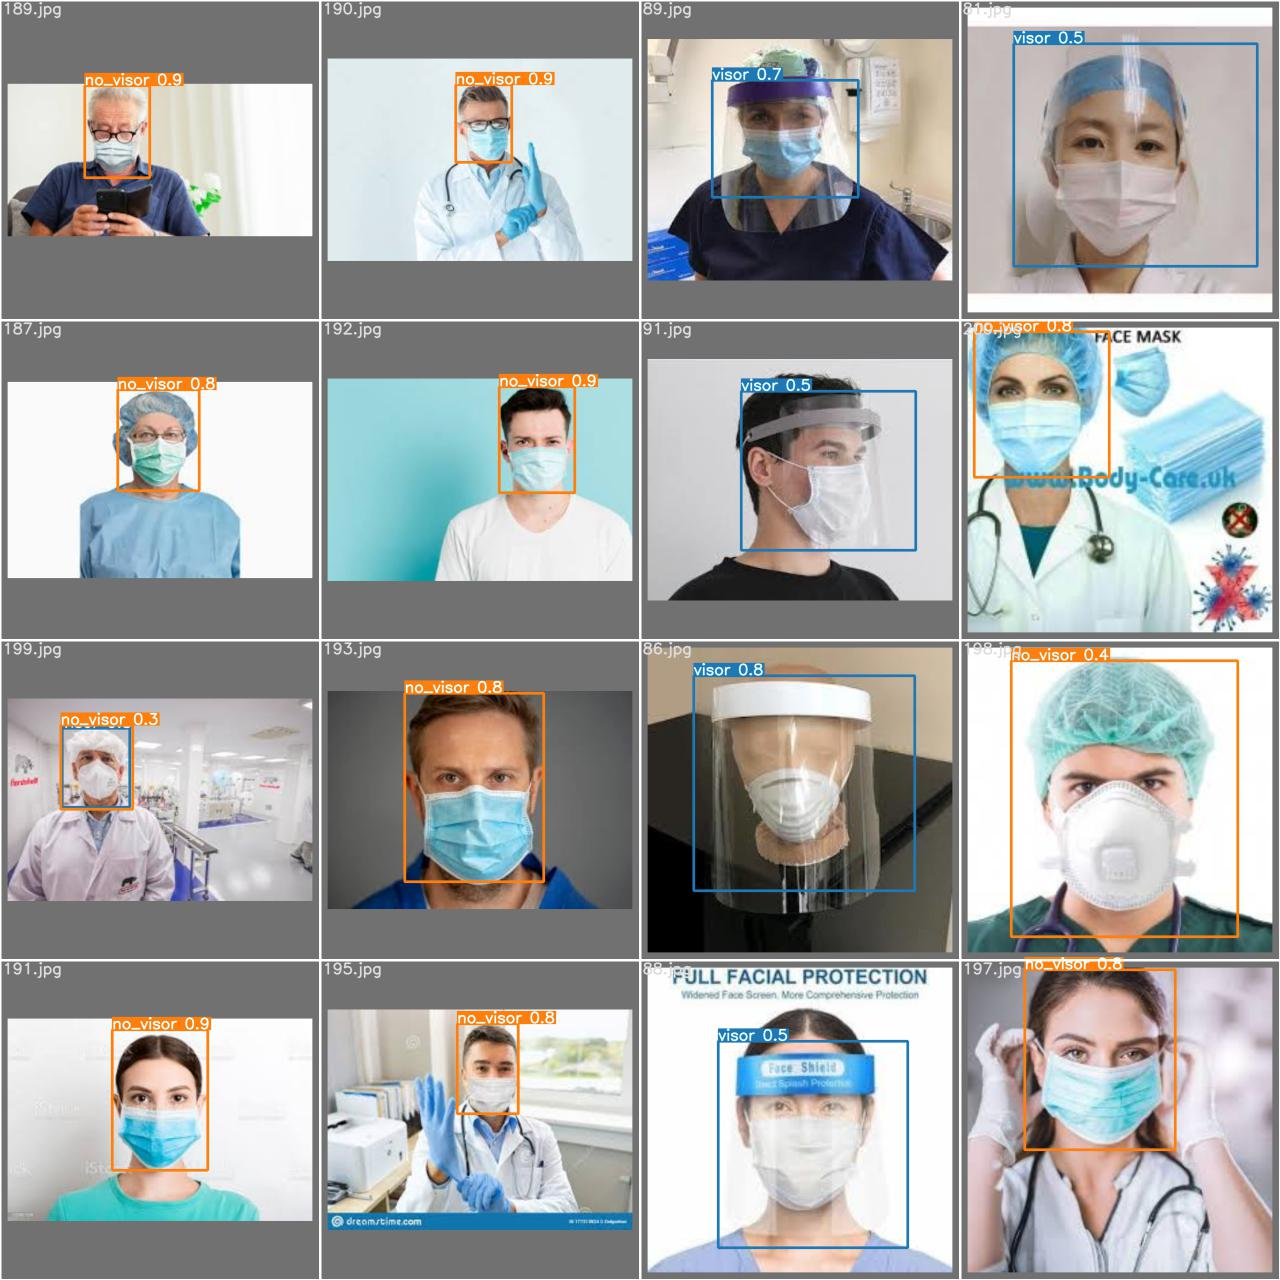

In [15]:
Image(filename='runs/train/exp2/train_batch0.jpg', width=800)  # train batch 0 mosaics and labels
Image(filename='runs/train/exp2/test_batch0_labels.jpg', width=800)  # test batch 0 labels
Image(filename='runs/train/exp2/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

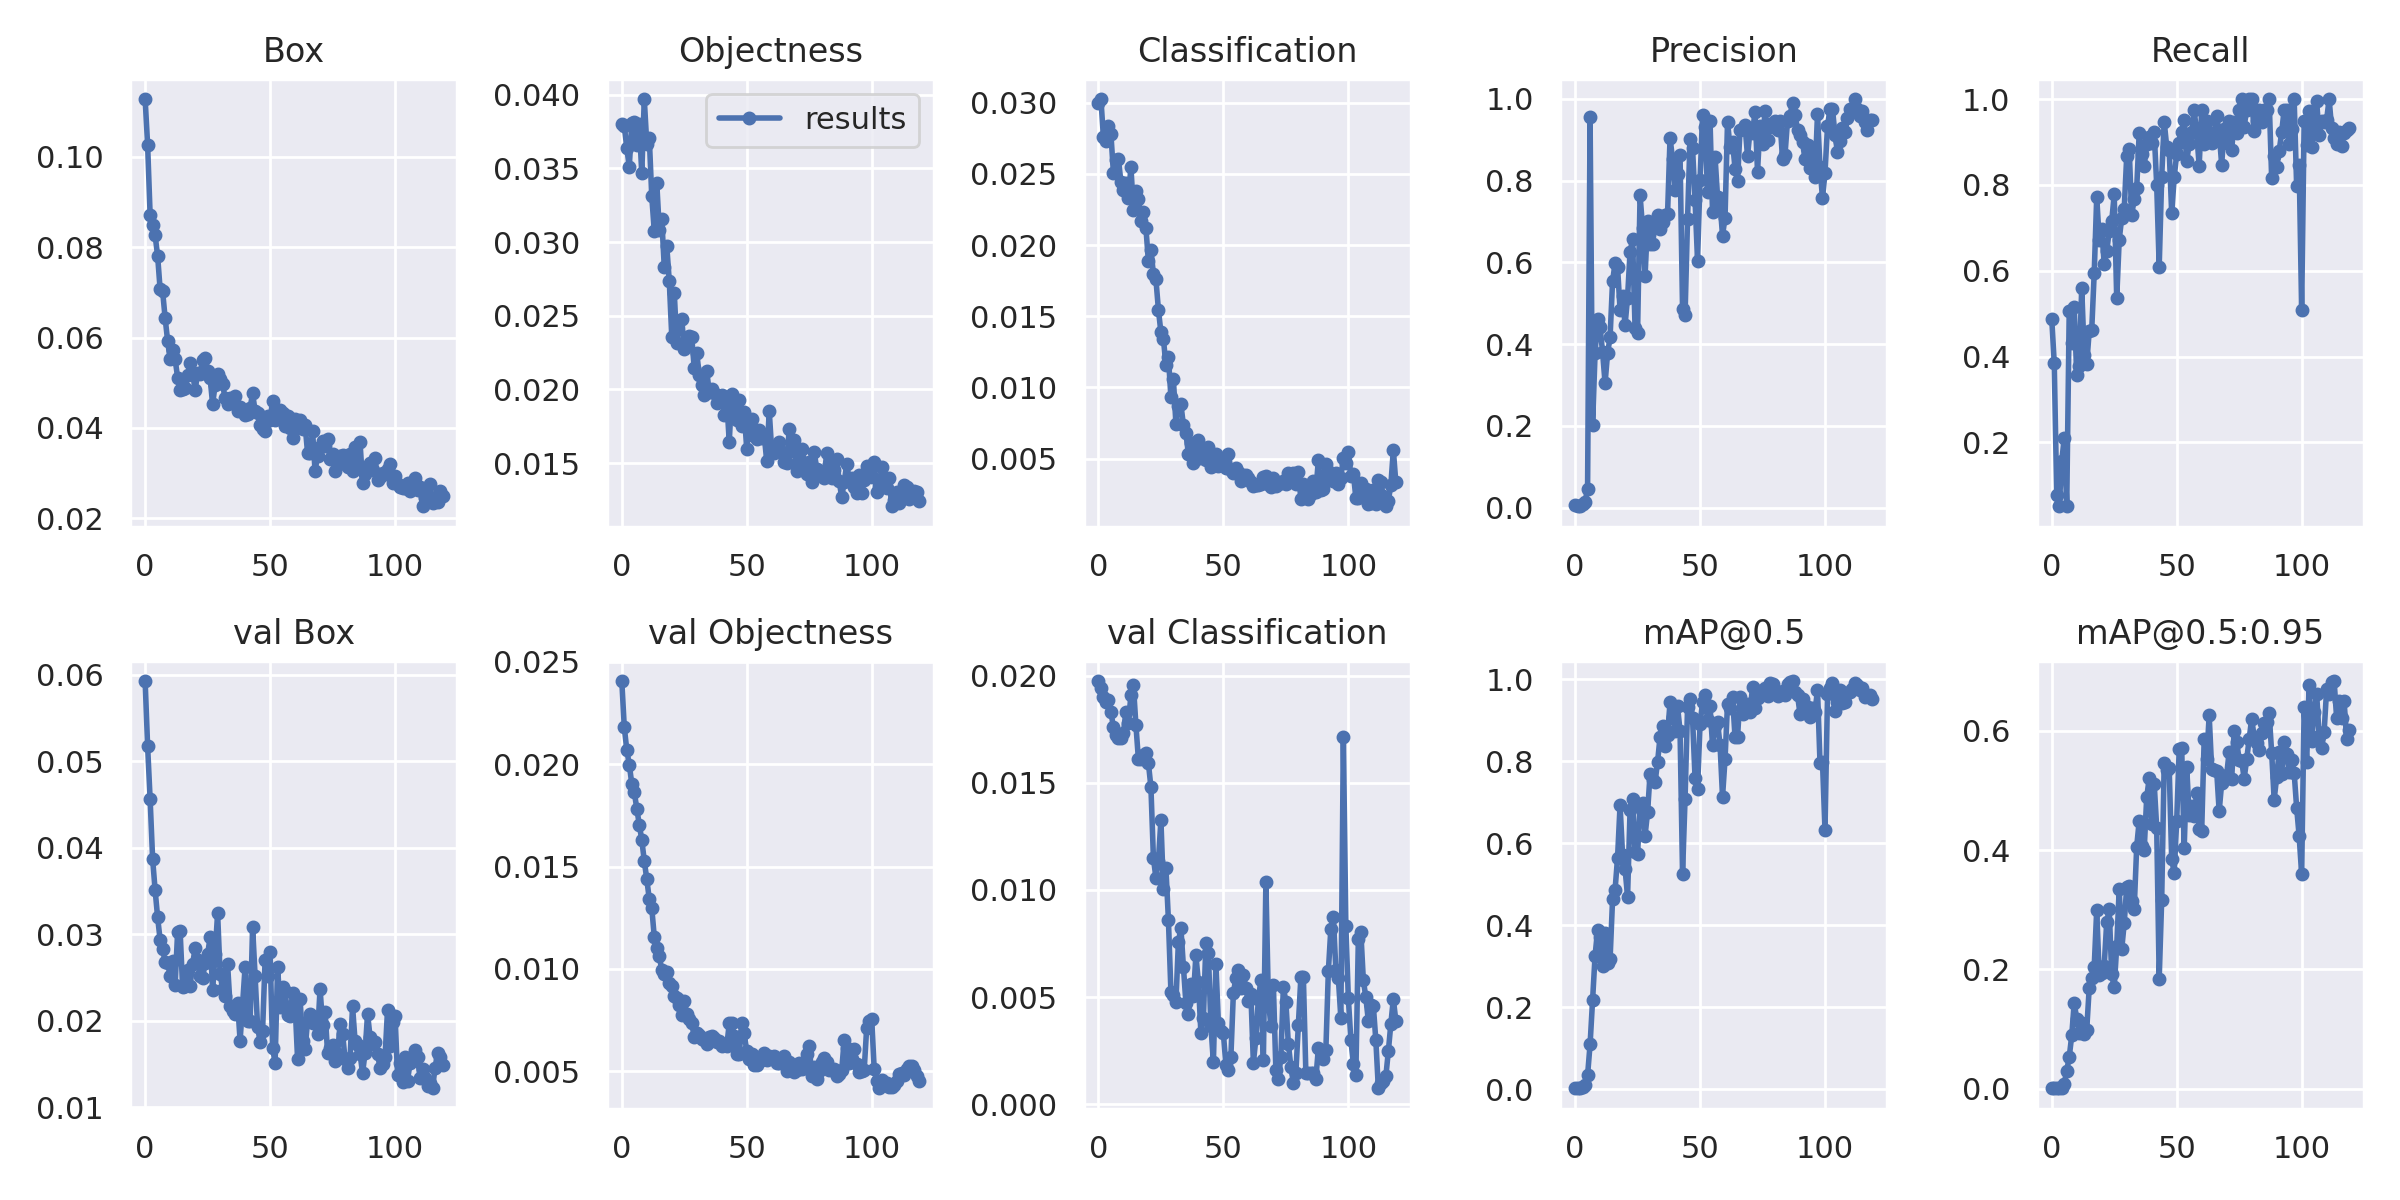

In [17]:
from utils.plots import plot_results 
Image(filename='runs/train/exp2/results.png', width=800)